In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# make sure you use Tesla K80 GPU (12GB), by changing 'runtmie type' 

!nvidia-smi

Sat Feb  8 02:34:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#clone darknet repository 
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 12441, done.
remote: Total 12441 (delta 0), reused 0 (delta 0), pack-reused 12441
Receiving objects: 100% (12441/12441), 11.38 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (8489/8489), done.


In [0]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 

In [0]:
# go to the darknet folder, enable GPU, then compile the entire thing
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
In file included from ./src/http_stream.cpp:576:0:
./src/httplib.h:129:0: warning: "INVALID_SOCKET" redefined
 #define INVALID_

In [0]:
# get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2020-02-08 02:38:02--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  69.2MB/s    in 3.7s    

2020-02-08 02:38:06 (64.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
!pwd

/content/darknet


In [0]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libvorbis-dev is already the newest version (1.3.5-4.2).
libvorbis-dev set to manually installed.
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
python3-numpy is already the newest version (1:1.13.3-2ubuntu1).
python3-numpy set to manually installed.
unzip is already the newest version (6.0-21ubuntu1).
libdc1394-22 is already the newest version (2.2.5-1).
libdc1394-22 set to manually installed.
libdc1394-22-dev is already the newest version (2.2.5-1).
libdc1394-22-dev set to manually installed.
libtbb-dev is already the newest version (2017~U7-8).
libtbb-dev set to manually installed.
libtiff5-dev is already the newest version (4.0.9-5ubuntu0.3).
libtiff5-dev set to manually installed.
qtbase5-dev is already the newest version (5.9.5+dfsg-0u

In [0]:
import urllib.request
url_link = "https://r8---sn-ni5f-tfbl.googlevideo.com/videoplayback?expire=1581151680&ei=YCE-XqfLEsG5kwav-bDQBA&ip=2604%3A180%3A3%3A376%3Abc14%3Aa829%3A2629%3A134f&id=o-ALrEIsslBSSI80pfEr52kILyV95HPeDh3GXVta3CwWVD&itag=18&source=youtube&requiressl=yes&vprv=1&mime=video%2Fmp4&gir=yes&clen=18027375&ratebypass=yes&dur=195.581&lmt=1390189237311647&fvip=5&fexp=23842630,23872989&c=WEB&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cgir%2Cclen%2Cratebypass%2Cdur%2Clmt&sig=ALgxI2wwRgIhAIzvDdu7IDUnzTaGSecexyv7oQpD5jRecm05397j9GiDAiEA4dQuRBmIAA53fRuP4YO1GuKC-YH62_WCce7kK8MeuOo%3D&redirect_counter=1&rm=sn-n4vl776&req_id=7f75fc8448dda3ee&cms_redirect=yes&ipbypass=yes&mip=24.79.130.134&mm=31&mn=sn-ni5f-tfbl&ms=au&mt=1581130007&mv=m&mvi=7&pcm2cms=yes&pl=22&lsparams=ipbypass,mip,mm,mn,ms,mv,mvi,pcm2cms,pl&lsig=AHylml4wRQIhAK1YFGOKHc9epJgASIoJkjcNJfhaM12wDxF0yywEGkNPAiBvqBbQ4KcPDOUmInzne7UEKbxgTavPbiLNdPIuX_Spng%3D%3D"
urllib.request.urlretrieve(url_link, 'sk.mp4') 

 

('sk.mp4', <http.client.HTTPMessage at 0x7f97df141208>)

In [0]:
from google.colab import files

uploaded = files.upload()

Saving sk.mp4 to sk (1).mp4


In [0]:
!pwd

/content/darknet


In [0]:
#%cd ..
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show sk.mp4 -i 0 -out_filename out.avi -thresh 0.7

 CUDA-version: 10000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
Demo
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10

In [0]:
#examole of image detection so-called 'easy-one'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/eagle.jpg 

 CUDA-version: 10000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv

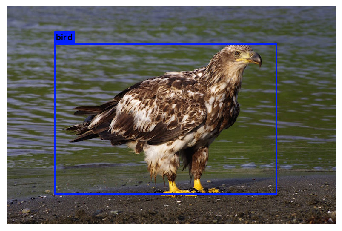

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)